In [1]:
import pandas as pd
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
pandas_table = pd.read_json("Sarcasm_Headlines_Dataset_v2.json", lines= True)
articles = Table.from_df(pandas_table)
articles = articles.with_column('length', articles.apply(len, 'headline'))
articles

article_link,headline,is_sarcastic,length
https://www.theonion.com/thirtysomething-scientists-unve ...,thirtysomething scientists unveil doomsday clock of hair ...,1,61
https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,dem rep. totally nails why congress is falling short on ...,0,79
https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,eat your veggies: 9 deliciously different recipes,0,49
https://local.theonion.com/inclement-weather-prevents-li ...,inclement weather prevents liar from getting to work,1,52
https://www.theonion.com/mother-comes-pretty-close-to-us ...,mother comes pretty close to using word 'streaming' corr ...,1,61
https://www.huffingtonpost.com/entry/my-white-inheritanc ...,my white inheritance,0,20
https://www.huffingtonpost.com/entry/5-ways-to-file-your ...,5 ways to file your taxes with less stress,0,42
https://www.theonion.com/richard-bransons-global-warming ...,richard branson's global-warming donation nearly as much ...,1,88
https://politics.theonion.com/shadow-government-getting- ...,shadow government getting too large to meet in marriott ...,1,73
https://www.huffingtonpost.comhttp://pubx.co/6IXxhm,lots of parents know this scenario,0,34


In [3]:
articles.labels

('article_link', 'headline', 'is_sarcastic', 'length')

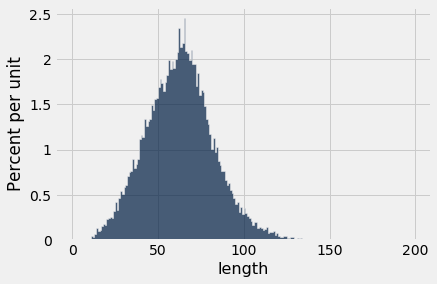

In [4]:
articles.hist('length', bins = np.arange(0,200,1))

In [5]:
max(articles.column('length'))

926

In [6]:
min(articles.column('length'))

7

In [3]:
sarcasm = articles.where('is_sarcastic', 1)
sarcasm

article_link,headline,is_sarcastic,length
https://www.theonion.com/thirtysomething-scientists-unve ...,thirtysomething scientists unveil doomsday clock of hair ...,1,61
https://local.theonion.com/inclement-weather-prevents-li ...,inclement weather prevents liar from getting to work,1,52
https://www.theonion.com/mother-comes-pretty-close-to-us ...,mother comes pretty close to using word 'streaming' corr ...,1,61
https://www.theonion.com/richard-bransons-global-warming ...,richard branson's global-warming donation nearly as much ...,1,88
https://politics.theonion.com/shadow-government-getting- ...,shadow government getting too large to meet in marriott ...,1,73
https://www.theonion.com/ford-develops-new-suv-that-runs ...,ford develops new suv that runs purely on gasoline,1,50
https://www.theonion.com/area-boy-enters-jumping-and-tou ...,area boy enters jumping-and-touching-tops-of-doorways phase,1,59
https://local.theonion.com/area-man-does-most-of-his-tra ...,area man does most of his traveling by gurney,1,45
https://www.theonion.com/guard-in-video-game-under-stric ...,guard in video game under strict orders to repeatedly pa ...,1,82
https://www.theonion.com/secret-service-agent-not-so-sec ...,secret service agent not so secret about being david ala ...,1,67


In [4]:
not_sarcasm = articles.where('is_sarcastic', 0).drop('is_sarcastic')
not_sarcasm

article_link,headline,length
https://www.huffingtonpost.com/entry/donna-edwards-inequ ...,dem rep. totally nails why congress is falling short on ...,79
https://www.huffingtonpost.com/entry/eat-your-veggies-9- ...,eat your veggies: 9 deliciously different recipes,49
https://www.huffingtonpost.com/entry/my-white-inheritanc ...,my white inheritance,20
https://www.huffingtonpost.com/entry/5-ways-to-file-your ...,5 ways to file your taxes with less stress,42
https://www.huffingtonpost.comhttp://pubx.co/6IXxhm,lots of parents know this scenario,34
https://www.huffingtonpost.com/entry/this-lesbian-is-con ...,this lesbian is considered a father in indiana (and an a ...,75
https://www.huffingtonpost.com/entry/amanda-peet-told-he ...,amanda peet told her daughter sex is 'a special hug',52
https://www.huffingtonpost.com/entry/what-to-know-regard ...,what to know regarding current treatments for ebola,51
https://www.huffingtonpost.com/entry/chris-christie-hill ...,chris christie suggests hillary clinton was to blame for ...,107
https://www.huffingtonpost.com/entry/uber-ceo-travis-kal ...,uber ceo travis kalanick stepping down from trump econom ...,75


In [8]:
articles.sort('length', descending = True).take(1).column(0).item(0)

'https://www.theonion.com/maya-angelou-poet-author-civil-rights-activist-and-1819591737'

In [5]:
articles.sort('length', descending = False).column(2).item(0)

0

In [46]:
## Returns an array containing the five figure summary for the overall data (not sorted by sarcasm)

length_array = articles.column('length')

minimum = min(length_array)
first = np.quantile(length_array,0.25)
middle = np.quantile(length_array, 0.5)
third = np.quantile(length_array, 0.75)
maximum = max(length_array)

five_figure_summary = make_array(minimum,first,middle,third,maximum)
five_figure_summary

array([  7.,  49.,  62.,  75., 926.])

In [25]:
def five_figure_summary(table):
    """" Returns an array containing the five figure summary of the given table"""
    length_array = table.column('length')
    minimum = min(length_array)
    first = np.quantile(length_array,0.25)
    middle = np.quantile(length_array, 0.5)
    third = np.quantile(length_array, 0.75)
    maximum = max(length_array)
    return make_array(minimum,first,middle,third,maximum)

In [26]:
labels_array = make_array('Minimum','First Quantile','Second Quantile','Third Quantile','Maximum')
articles_array = five_figure_summary(articles)
sarcasm_array = five_figure_summary(sarcasm)
not_sarcasm_array = five_figure_summary(not_sarcasm)

In [44]:
# Table containing all of the five figure summaries for the data

summary_table = Table().with_columns(
    '',labels_array,
    'Overall Article', articles_array,
    'Sarcasm',sarcasm_array,
    'Not Sarcasm',not_sarcasm_array,)
summary_table 

,Overall Article,Sarcasm,Not Sarcasm
Minimum,7,8,7
First Quantile,49,49,48
Second Quantile,62,64,61
Third Quantile,75,80,71
Maximum,926,926,228


In [45]:
difference_array = summary_table.column('Sarcasm')- summary_table.column('Not Sarcasm')
summary_table = summary_table.with_column('Difference', difference_array)
summary_table

,Overall Article,Sarcasm,Not Sarcasm,Difference
Minimum,7,8,7,1
First Quantile,49,49,48,1
Second Quantile,62,64,61,3
Third Quantile,75,80,71,9
Maximum,926,926,228,698


In [47]:
summary_table = summary_table.with_row(average_array)
summary_table

,Overall Article,Sarcasm,Not Sarcasm,Difference
Minimum,7.0,8.0,7.0,1.0
First Quantile,49.0,49.0,48.0,1.0
Second Quantile,62.0,64.0,61.0,3.0
Third Quantile,75.0,80.0,71.0,9.0
Maximum,926.0,926.0,228.0,698.0
Average,62.30857122890387,65.33101070852281,59.55862529195863,5.772385416564184


In [8]:
five_figure_summary(not_sarcasm)

array([  7.,  48.,  61.,  71., 228.])

In [36]:
average_array = make_array('Average', np.average(articles.column('length')),np.average(sarcasm.column('length')),np.average(not_sarcasm.column('length')),(np.average(sarcasm.column('length'))-np.average(not_sarcasm.column('length'))))

In [37]:
average_array

array(['Average', '62.30857122890387', '65.33101070852281',
       '59.55862529195863', '5.772385416564184'], dtype='<U17')

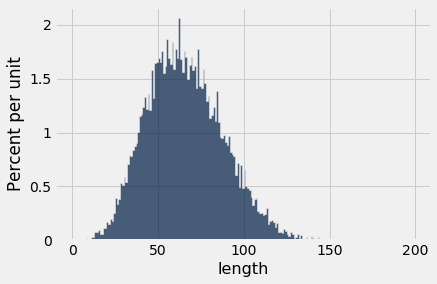

In [27]:
sarcasm.hist('length', bins = np.arange(200))

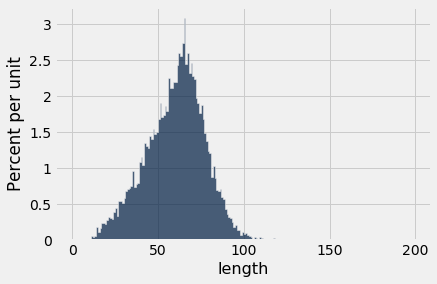

In [34]:
not_sarcasm.hist('length', bins = np.arange(200))

In [9]:
## The number of sarcastic headlines that are LONGER than the longest 'Non Sarcastic' headline

np.count_nonzero(max(not_sarcasm.column('length')) < sarcasm.column('length'))

4

In [10]:
## The longest 'Non Sarcastic' headline

not_sarcasm.sort('length', descending = True).column('headline').item(0)

'occasionally you realize someone you thought was a dear friend is actually a foe, their true character finally revealed. but how do you forgive the unforgivable? here are my 10 steps to handling betrayal with elegance and grace.'